<a href="https://colab.research.google.com/github/MCV-Jimenez/Stellar-Classification-Project/blob/main/P2P3_Stellar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stellar Classification

**Marco Jimenez**

04/22/2022

### Column Info

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# Libraries & Data

In [56]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display='diagram')

In [57]:
# Loading data
df = pd.read_csv('/content/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Inspecting Data

In [58]:
# Inspecting data
print(df.info(), '\n')
print(df.describe(), '\n')
print('missing values', df.isna().sum(), '\n')
print('duplicates:', df.duplicated().sum(), '\n')
print('Target Column Values:','\n',df['class'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There are no duplicate rows, missing or impossible values, or inconsistent columns. 

# Visualizations

Target univariate visual

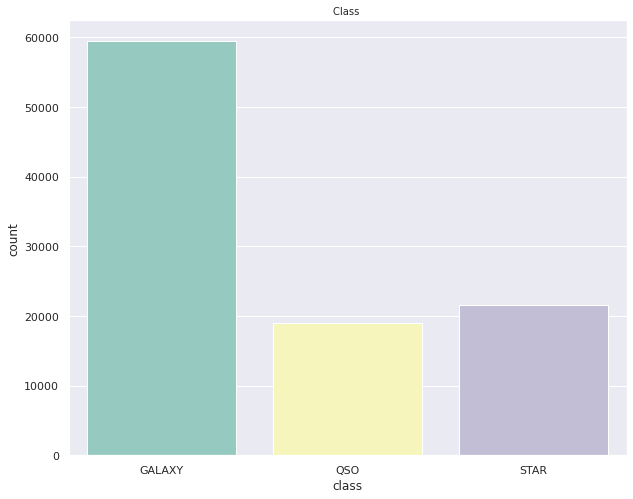

In [59]:
# Visual for the target column
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(data=df, x='class', palette='Set3')
plt.title("Class ", fontsize=10)
plt.show();

There is a clear imbalance in the target column

Visuals for the rest of the features

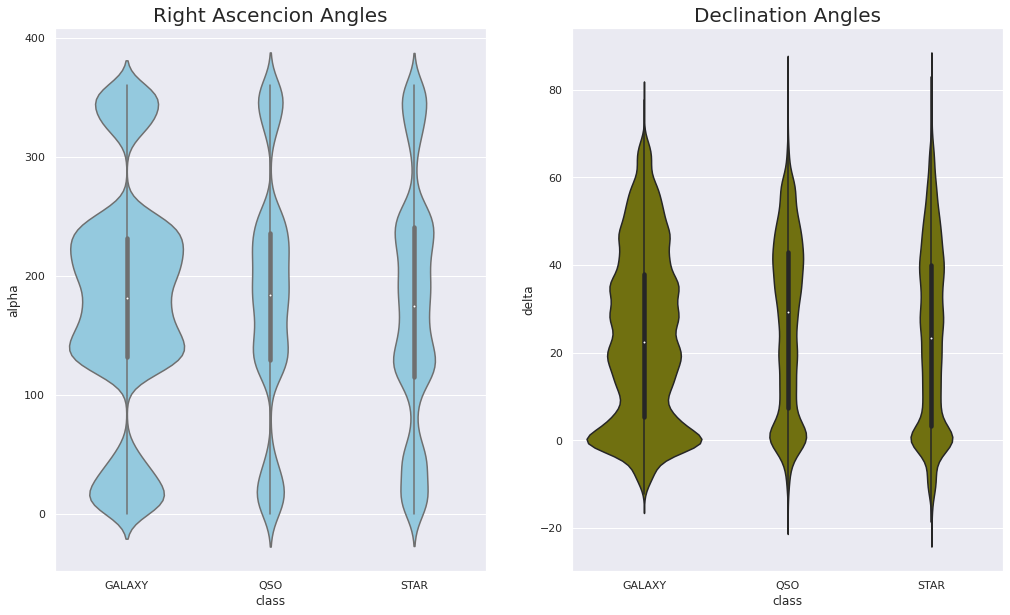

In [61]:
# Visualizing angular columns
sns.set_theme()
fig, axs = plt.subplots(1, 2, figsize=(17,10))
sns.violinplot(x=df['class'], y = df['alpha'], color="skyblue",scale='count', ax=axs[0])
sns.violinplot(x=df['class'], y = df['delta'], color="olive", scale='count', ax=axs[1])
axs[0].set_title('Right Ascencion Angles', fontsize=20)
axs[1].set_title('Declination Angles', fontsize=20);

The angular data doesn't contribute to the classification of galaxies, stars, or quasars. I will probably drop these columns from the dataset for machine learning.

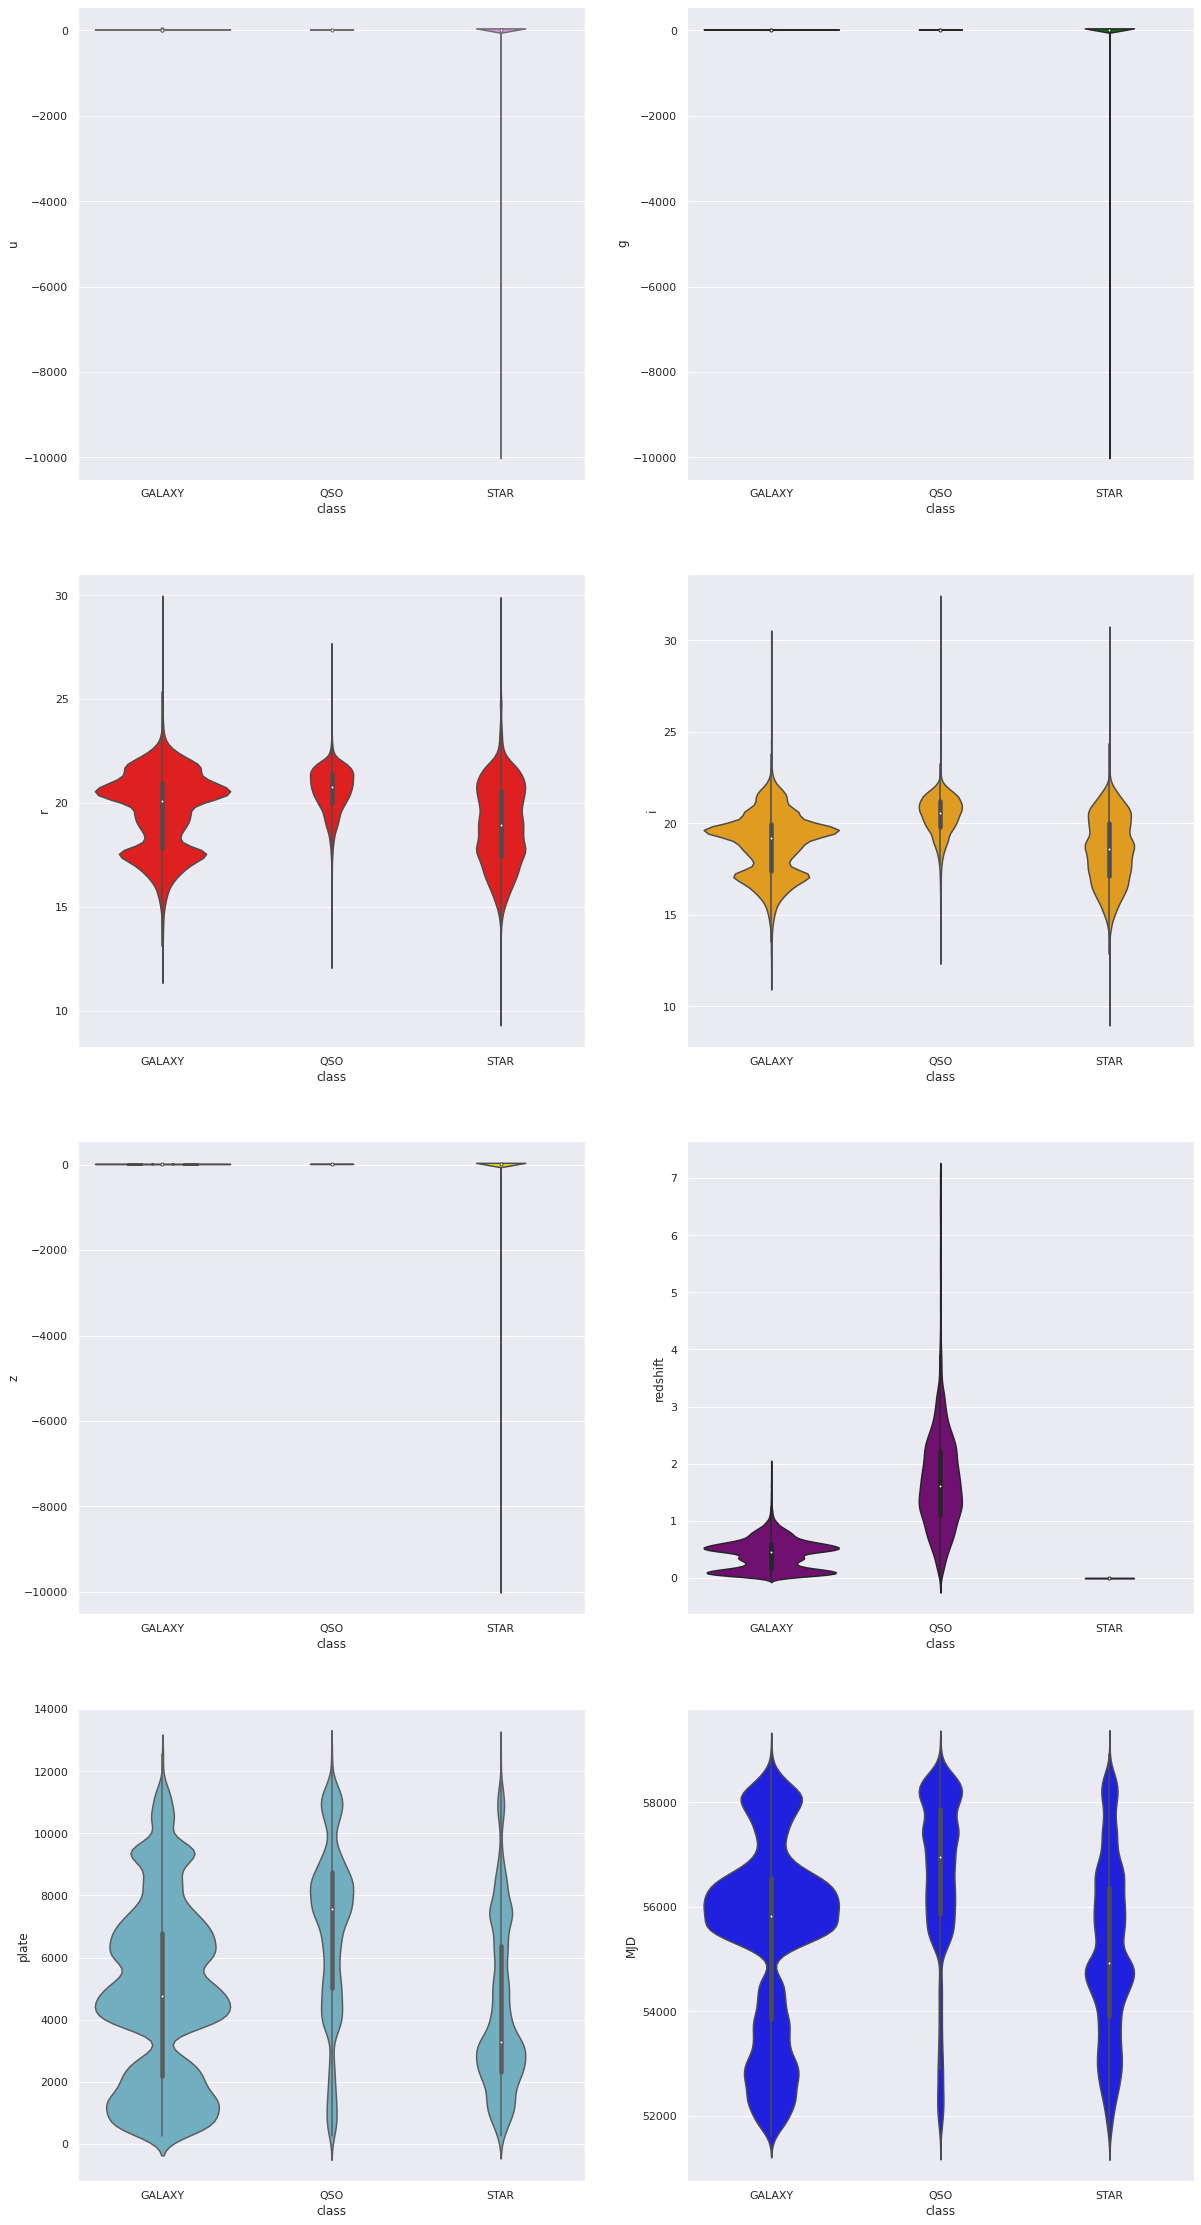

In [63]:
# Visualizing the spectral columns
fig, axs = plt.subplots(4, 2, figsize=(20,40))
sns.violinplot(x=df['class'], y = df['u'], color="violet", scale='count', ax=axs[0,0])
sns.violinplot(x=df['class'], y = df['g'], color="green", scale='count', ax=axs[0,1])
sns.violinplot(x=df['class'], y = df['r'], color="red", scale='count', ax=axs[1,0]);
sns.violinplot(x=df['class'], y = df['i'], color="orange", scale='count', ax=axs[1,1]);
sns.violinplot(x=df['class'], y = df['z'], color="yellow", scale='count', ax=axs[2,0]);
sns.violinplot(x=df['class'], y = df['redshift'], color="purple", scale='count', ax=axs[2,1]);
sns.violinplot(x=df['class'], y = df['plate'], color="c", scale='count', ax=axs[3,0]);
sns.violinplot(x=df['class'], y = df['MJD'], color="blue", scale='count', ax=axs[3,1]);

The spectral data is essential in stellar classification but there are a lot of outliers. I may have to remove them if it has too much of an affect on my machine learning model.

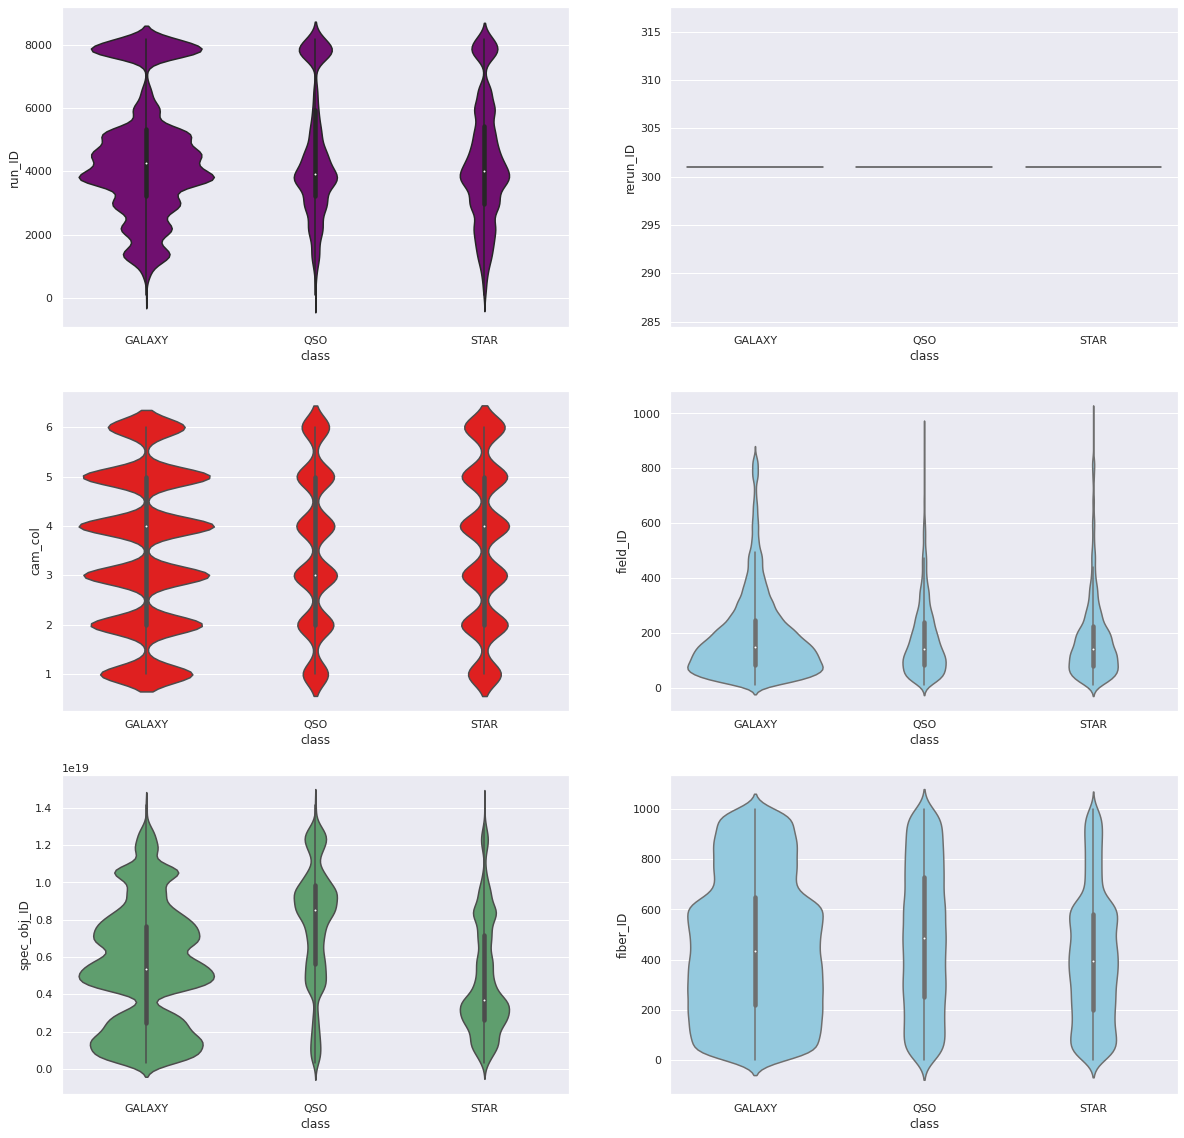

In [64]:
# Analyzing ID Columns
fig, axs = plt.subplots(3,2, figsize=(20,20))
sns.violinplot(x=df['class'], y = df['run_ID'], color="purple", scale='count', ax=axs[0,0])
sns.violinplot(x=df['class'], y = df['rerun_ID'], color="grey", scale='count', ax=axs[0,1])
sns.violinplot(x=df['class'], y = df['cam_col'], color="red", scale='count', ax=axs[1,0])
sns.violinplot(x=df['class'], y = df['field_ID'], color="skyblue", scale='count', ax=axs[1,1])
sns.violinplot(x=df['class'], y = df['spec_obj_ID'], color="g", scale='count', ax=axs[2,0])
sns.violinplot(x=df['class'], y = df['fiber_ID'], color="skyblue", scale='count', ax=axs[2,1]);

The remainder of the columns mostly dont contribute to stellar classification. maybe the spec_obj_ID column, but the rest can be dropped prior to machine lreaning.

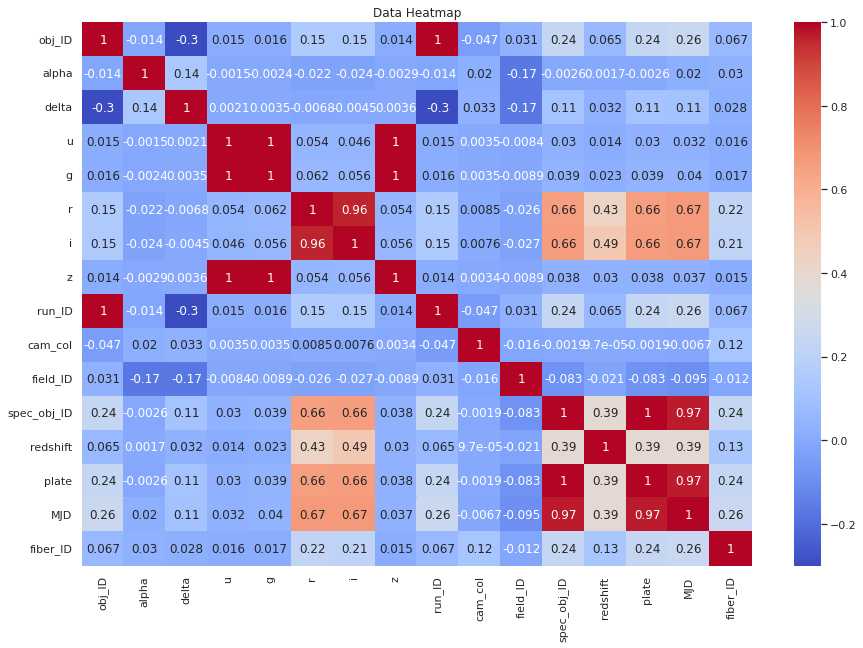

In [65]:
# Creating a correlation heatmap of numerical data
corr = df.drop(columns='rerun_ID').corr() 
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Data Heatmap');

Colums with 100% positive correlation:

*    g(Green filter) w/ u(Ultraviolet filter) 
*    z(Infared filter) w/ u & g
*    run_ID & obj_ID 
*    plate & spec_obj_ID

Columns with a strong positive correlation:
*    96%: i(Near infared) w/ r(Red filter)
*    97%: MJD(Modified Julian Date) w/ spec_obj_ID & plate

Columns with a moderate correlation:
*    spec_obj_ID w/ r(Red filter) & i
*    plate w/ r & i
*    MJD w/ r & i